# Contents

- [Load Data](#Load-Data)
- [Duration(min) OLS](#Duration(min)-OLS)
- [Duration(min) Explore](#Duration(min)-Explore)
    - [1. Outlier](#1.-Outlier)
    - [2. Check Assumptions](#2.-Check-Assumptions)
        - [(1) Nonlinear / Non-constant Variance - take log of Y](#(1)-Nonlinear-/-Non-constant-Variance---take-log-of-Y)
        - [(2). Normality](#2.-Normality)
        - [(3). Correlation](#3.-Correlation)
    - [3. Regression Models](#Regression-Models)

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
import plotly.express as px
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import plotly.offline as py


In [2]:
df = pd.read_csv('cleaned_US_Accidents.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Duration', 'Duration(min)'],
      dtype='object')

In [4]:
#Duration(min) = Duration
print(len(df))
sum(df['Duration(min)']==df['Duration'])

#Duration = End_Time - Start_Time
#ls = pd.to_datetime(df['End_Time']) - pd.to_datetime(df['Start_Time'])
#ls.dt.seconds

2081305


2081305

## Duration(min) OLS

In [5]:
# Data type process
df['Zipcode'] = df['Zipcode'].apply(lambda x: int(x[:5]))
df.loc[:, 'Amenity':'Traffic_Signal'] = df.loc[:, 'Amenity':'Traffic_Signal'].astype(int)

In [6]:
#df_ny
df = df[df.County == 'New York']

In [16]:
df

Unnamed: 0         ID  Severity           Start_Time  \
1857           1871    A-39606         3  2016-12-24 13:58:51   
1881           1895    A-40419         4  2016-12-29 10:04:54   
1897           1911    A-40493         2  2016-12-29 13:55:09   
2790           2804    A-46772         4  2017-01-23 20:05:16   
3808           3970    A-96586         2  2016-03-28 07:49:42   
...             ...        ...       ...                  ...   
2079860     2205482  A-2843386         2  2019-08-20 14:54:26   
2080249     2205985  A-2843917         2  2019-08-21 17:32:29   
2080638     2206482  A-2844445         2  2019-08-22 08:16:10   
2080656     2206500  A-2844465         2  2019-08-22 15:14:32   
2081024     2206966  A-2844954         2  2019-08-23 10:04:09   

                    End_Time  Start_Lat  Start_Lng    End_Lat    End_Lng  \
1857     2016-12-24 19:58:51  40.819112 -73.934260  40.821441 -73.934329   
1881     2016-12-29 16:04:54  40.759630 -73.995480  40.758430 -73.992650   
1897     2016-12-29 19:55:09  40.805270 -73.932140  40.803340 -73.930620   
2790     2017-01-24 02:05:16  40.765520 -73.972100  40.764151 -73.973110   
3808     2016-03-28 13:49:42  40.849790 -73.943790  40.849400 -73.942070   
...                      ...        ...        ...        ...        ...   
2079860  2019-08-20 15:23:31  40.737500 -73.974270  40.739760 -73.972910   
2080249  2019-08-21 18:01:32  40.850020 -73.943992  40.853290 -73.960640   
2080638  2019-08-22 08:44:59  40.760390 -73.962860  40.752581 -73.944912   
2080656  2019-08-22 15:44:00  40.748080 -73.967930  40.751223 -73.965275   
2081024  2019-08-23 10:31:58  40.850020 -73.943992  40.853290 -73.960640   

         Distance(mi)  ... No_Exit Railway Roundabout Station Stop  \
1857            0.161  ...       0       0          0       0    0   
1881            0.170  ...       0       0          0       0    0   
1897            0.155  ...       0       0          0       0    0   
2790            0.108  ...       0       0          0       0    0   
3808            0.094  ...       0       0          0       0    0   
...               ...  ...     ...     ...        ...     ...  ...   
2079860         0.172  ...       0       0          0       0    0   
2080249         0.899  ...       0       0          0       0    0   
2080638         1.083  ...       0       0          0       0    0   
2080656         0.258  ...       0       0          0       0    0   
2081024         0.899  ...       0       0          0       0    0   

         Traffic_Calming  Traffic_Signal  Sunrise_Sunset    Duration  \
1857                   0               0             Day  360.000000   
1881                   0               1             Day  360.000000   
1897                   0               0             Day  360.000000   
2790                   0               1           Night  360.000000   
3808                   0               0             Day  360.000000   
...                  ...             ...             ...         ...   
2079860                0               0             Day   29.083333   
2080249                0               0             Day   29.050000   
2080638                0               0             Day   28.816667   
2080656                0               0             Day   29.466667   
2081024                0               0             Day   27.816667   

         Duration(min)  
1857        360.000000  
1881        360.000000  
1897        360.000000  
2790        360.000000  
3808        360.000000  
...                ...  
2079860      29.083333  
2080249      29.050000  
2080638      28.816667  
2080656      29.466667  
2081024      27.816667  

[4794 rows x 38 columns]

In [20]:
df['weekday'] = df.apply(lambda x: pd.Timestamp(x['Start_Time']).dayofweek, axis = 1)

In [23]:
df['hour'] = df.apply(lambda x: pd.Timestamp(x['Start_Time']).hour, axis = 1)

In [24]:
df

Unnamed: 0         ID  Severity           Start_Time  \
1857           1871    A-39606         3  2016-12-24 13:58:51   
1881           1895    A-40419         4  2016-12-29 10:04:54   
1897           1911    A-40493         2  2016-12-29 13:55:09   
2790           2804    A-46772         4  2017-01-23 20:05:16   
3808           3970    A-96586         2  2016-03-28 07:49:42   
...             ...        ...       ...                  ...   
2079860     2205482  A-2843386         2  2019-08-20 14:54:26   
2080249     2205985  A-2843917         2  2019-08-21 17:32:29   
2080638     2206482  A-2844445         2  2019-08-22 08:16:10   
2080656     2206500  A-2844465         2  2019-08-22 15:14:32   
2081024     2206966  A-2844954         2  2019-08-23 10:04:09   

                    End_Time  Start_Lat  Start_Lng    End_Lat    End_Lng  \
1857     2016-12-24 19:58:51  40.819112 -73.934260  40.821441 -73.934329   
1881     2016-12-29 16:04:54  40.759630 -73.995480  40.758430 -73.992650   
1897     2016-12-29 19:55:09  40.805270 -73.932140  40.803340 -73.930620   
2790     2017-01-24 02:05:16  40.765520 -73.972100  40.764151 -73.973110   
3808     2016-03-28 13:49:42  40.849790 -73.943790  40.849400 -73.942070   
...                      ...        ...        ...        ...        ...   
2079860  2019-08-20 15:23:31  40.737500 -73.974270  40.739760 -73.972910   
2080249  2019-08-21 18:01:32  40.850020 -73.943992  40.853290 -73.960640   
2080638  2019-08-22 08:44:59  40.760390 -73.962860  40.752581 -73.944912   
2080656  2019-08-22 15:44:00  40.748080 -73.967930  40.751223 -73.965275   
2081024  2019-08-23 10:31:58  40.850020 -73.943992  40.853290 -73.960640   

         Distance(mi)  ... Roundabout Station Stop Traffic_Calming  \
1857            0.161  ...          0       0    0               0   
1881            0.170  ...          0       0    0               0   
1897            0.155  ...          0       0    0               0   
2790            0.108  ...          0       0    0               0   
3808            0.094  ...          0       0    0               0   
...               ...  ...        ...     ...  ...             ...   
2079860         0.172  ...          0       0    0               0   
2080249         0.899  ...          0       0    0               0   
2080638         1.083  ...          0       0    0               0   
2080656         0.258  ...          0       0    0               0   
2081024         0.899  ...          0       0    0               0   

        Traffic_Signal  Sunrise_Sunset    Duration  Duration(min)  weekday  \
1857                 0             Day  360.000000     360.000000        5   
1881                 1             Day  360.000000     360.000000        3   
1897                 0             Day  360.000000     360.000000        3   
2790                 1           Night  360.000000     360.000000        0   
3808                 0             Day  360.000000     360.000000        0   
...                ...             ...         ...            ...      ...   
2079860              0             Day   29.083333      29.083333        1   
2080249              0             Day   29.050000      29.050000        2   
2080638              0             Day   28.816667      28.816667        3   
2080656              0             Day   29.466667      29.466667        3   
2081024              0             Day   27.816667      27.816667        4   

         hour  
1857       13  
1881       10  
1897       13  
2790       20  
3808        7  
...       ...  
2079860    14  
2080249    17  
2080638     8  
2080656    15  
2081024    10  

[4794 rows x 40 columns]

<AxesSubplot:>

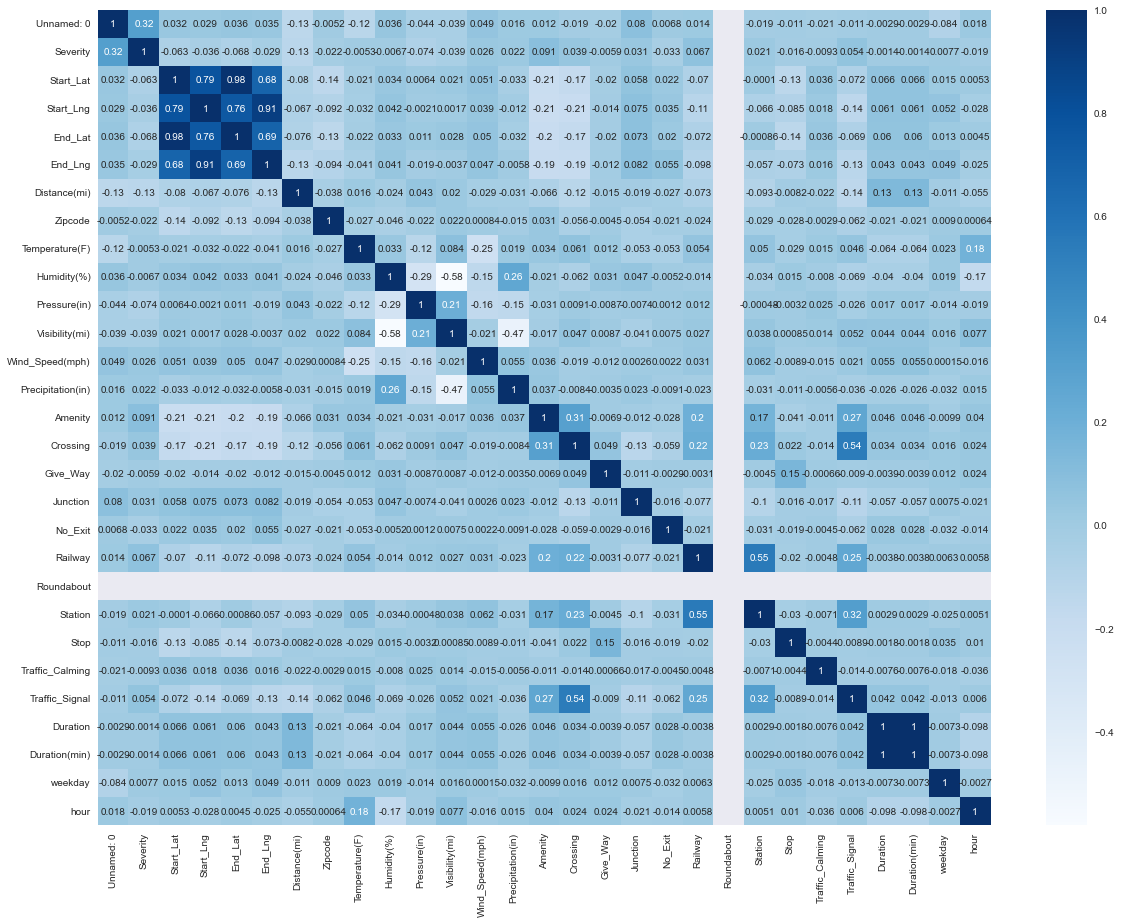

In [26]:
fig = plt.figure(figsize = (20,15))
#df_plot = df.iloc[:,:-1]
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [27]:
len(df)

4794

In [30]:
# Split Train/Test
#### Orginal data
train_df, test_df = train_test_split(df, test_size=0.2)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     10.28
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           7.94e-32
Time:                        22:05:51   Log-Likelihood:                -5531.4
No. Observations:                3835   AIC:                         1.110e+04
Df Residuals:                    3814   BIC:                         1.124e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -94.7205     15.14

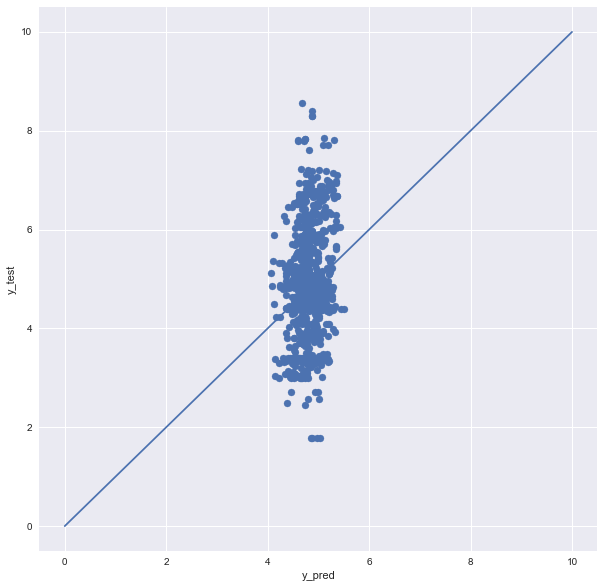

In [32]:
X_train = train_df.loc[:, ['Start_Lat', 
                            #'Start_Lng', 'End_Lat', 'End_Lng', 
                           # 'Distance(mi)',
                           'weekday',
                           'hour',
                           'Zipcode', 
                           'Temperature(F)', 'Humidity(%)', 
                           'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                           'Precipitation(in)', 'Amenity', 'Crossing',
                           'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                           'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                           'Traffic_Signal']]
y_train = np.log(train_df.loc[:, 'Duration'])
# y_train = train_df.loc[:, 'Duration']

X_test = test_df.loc[:, ['Start_Lat', 
                         #'Start_Lng', 'End_Lat', 'End_Lng', 
                         # 'Distance(mi)',
                         'weekday',
                           'hour',
                           'Zipcode', 
                          'Temperature(F)', 'Humidity(%)', 
                           'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                           'Precipitation(in)', 'Amenity', 'Crossing',
                           'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                           'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                           'Traffic_Signal']]
y_test = np.log(test_df.loc[:, 'Duration'])
# y_test = test_df.loc[:, 'Duration']

#### To keep stats align with sklearn
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

#### Model
model = sm.OLS(y_train, X_train).fit()

#### Predict performance
y_pred = model.predict(X_test)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot()
ax1.scatter(y_pred, y_test)
ax1.plot(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
# ax1.plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100))

ax1.set_xlabel("y_pred")
ax1.set_ylabel("y_test")
print(model.summary())

<AxesSubplot:>

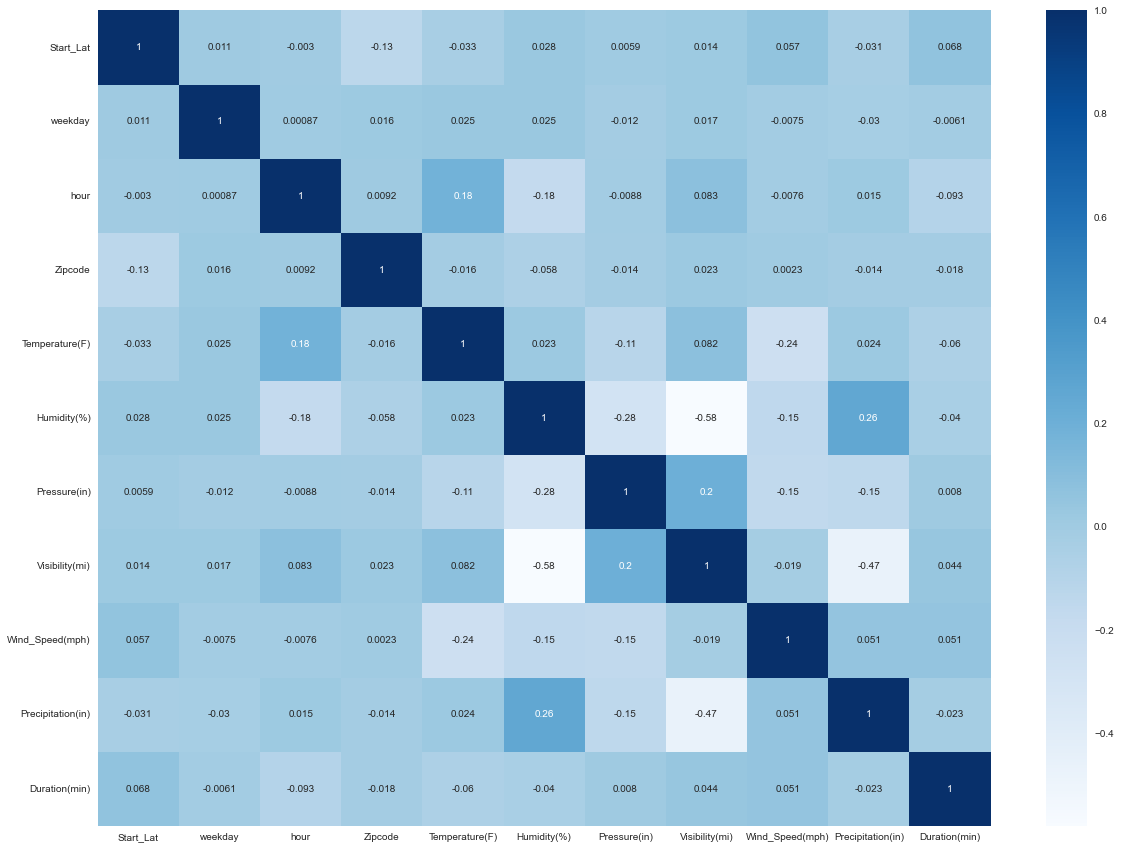

In [33]:
fig = plt.figure(figsize = (20,15))
train_df_corr = train_df.loc[:, ['Start_Lat', 
                            #'Start_Lng', 'End_Lat', 'End_Lng', 
                           # 'Distance(mi)',
                            'weekday',
                           'hour',
                           'Zipcode', 
                           'Temperature(F)', 'Humidity(%)', 
                           'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                           'Precipitation(in)', 'Duration(min)']]
sns.heatmap(train_df_corr.corr(), annot=True, cmap='Blues')

## Duration(min) Explore

### 1. Outlier

In [34]:
df_1 = df[['Duration(min)', 'Distance(mi)', 'Severity']]
#df_1 = df_1[df_1['Duration(min)']>=0]
len(df_1)

4794

In [35]:
# fig = plt.figure(figsize = (20,15))
fig, ax = plt.subplots()
sns.distplot(df['Duration(min)'],bins = 1000, ax=ax).set(title='Duration(min) Distribution')
ax.set_xlim(0,1000)
print(np.mean(df['Duration(min)']))

231.0989292170769


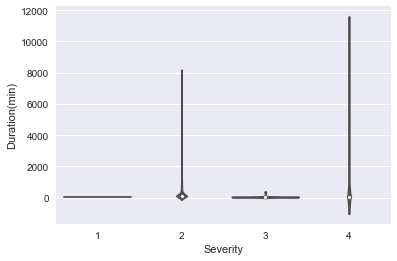

In [36]:
# distance
ax = sns.violinplot(x="Severity", y="Duration(min)", data=df_1)

In [37]:
df1 = df_1[df_1['Severity']==1]
df2 = df_1[df_1['Severity']==2]
df3 = df_1[df_1['Severity']==3]
df4 = df_1[df_1['Severity']==4]

In [38]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(range(len(df1['Duration(min)'])),df1['Duration(min)'])
ax2.scatter(range(len(df2['Duration(min)'])),df2['Duration(min)'])
ax3.scatter(range(len(df3['Duration(min)'])),df3['Duration(min)'])
ax4.scatter(range(len(df4['Duration(min)'])),df4['Duration(min)'])

# outlier cut off (3*std)
u_1 = df1["Duration(min)"].mean() + 3*df1["Duration(min)"].std()
l_1 = df1["Duration(min)"].mean() - 3*df1["Duration(min)"].std()
u_2 = df2["Duration(min)"].mean() + 3*df2["Duration(min)"].std()
l_2 = df2["Duration(min)"].mean() - 3*df2["Duration(min)"].std()
u_3 = df3["Duration(min)"].mean() + 3*df3["Duration(min)"].std()
l_3 = df3["Duration(min)"].mean() - 3*df3["Duration(min)"].std()
u_4 = df4["Duration(min)"].mean() + 3*df4["Duration(min)"].std()
l_4 = df4["Duration(min)"].mean() - 3*df4["Duration(min)"].std()
print(u_1, u_2, u_3, u_4)

ax1.hlines(u_1, xmin=0, xmax=len(df1['Duration(min)']), colors='red')
ax2.hlines(u_2, xmin=0, xmax=len(df2['Duration(min)']), colors='red')
ax3.hlines(u_3, xmin=0, xmax=len(df3['Duration(min)']), colors='red')
ax4.hlines(u_4, xmin=0, xmax=len(df4['Duration(min)']), colors='red')

# ax1.hist(df1['Duration(min)'], bins=10, range=(0, 0.5), density=True)
# ax2.hist(df2['Duration(min)'], bins=10, range=(0, 25), density=True)
# ax3.hist(df3['Duration(min)'], bins=10, range=(0, 25), density=True)
# ax4.hist(df4['Duration(min)'], bins=10, range=(0, 25), density=True)

# print(np.mean(df1['Duration(min)']), np.mean(df2['Duration(min)']), np.mean(df3['Duration(min)']), np.mean(df4['Duration(min)']))

## not align with severity

nan 1432.9521226279053 180.84899015743045 4760.594222322583


1631.7327119702375
1.1331477166459982
1.1331477166459982
percentile
829.9249999999997
0.5763368055555553
236.81405370454888


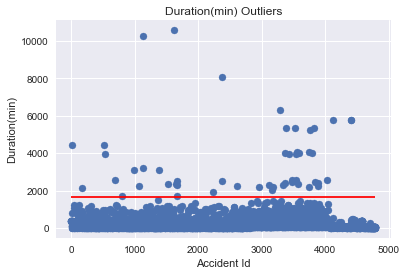

In [39]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot()

ax1.scatter(range(len(df_1['Duration(min)'])),df_1['Duration(min)'])

u_all = df_1["Duration(min)"].mean() + 3*df_1["Duration(min)"].std()
l_all = df_1["Duration(min)"].mean() - 3*df_1["Duration(min)"].std()

ax1.hlines(u_all, xmin=0, xmax=len(df_1['Duration(min)']), colors='red')
ax1.set_xlabel('Accident Id')
ax1.set_ylabel('Duration(min)')
ax1.set_title('Duration(min) Outliers')
print(u_all)
print(u_all/60/24)
# 20 days - still too large

print((df_1["Duration(min)"].mean() + 3*df_1["Duration(min)"].std())/60/24)
# percentile
print('percentile')
per = (np.percentile(df2['Duration(min)'],95))
print(per)
print(per/60/24)
print(np.mean(df2['Duration(min)']))
#ax1.hlines(u_all, xmin=0, xmax=len(df_1['Duration(min)']), colors='blue')
#blue line is more reasonable


In [40]:
# df_filtered_1 = df[df["Duration(min)"] <= df_1["Duration(min)"].mean() + 3*df_1["Duration(min)"].std()]
df_filtered_1 = df[df["Duration(min)"] <= per]

In [41]:
len(df_filtered_1)

4567

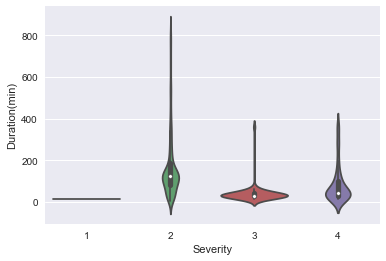

In [42]:
# distance
ax = sns.violinplot(x="Severity", y="Duration(min)", data=df_filtered_1)

### 2. Check Assumptions

#### (1) Nonlinear / Non-constant Variance - take log of Y
* Residual Plot
* (stationary test/ cointegration)

[Text(0.5, 1.0, 'OLS - Duration(min)')]

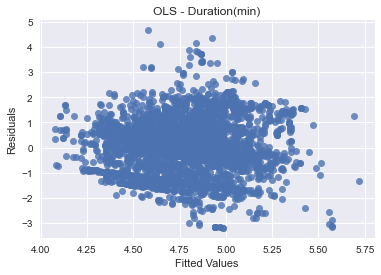

In [43]:
# residual plot
fitted_values = pd.Series(model.fittedvalues, name="Fitted Values")
residuals = pd.Series(model.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False).set(title = 'OLS - Duration(min)')

#### 2. Normality
* QQ Plot

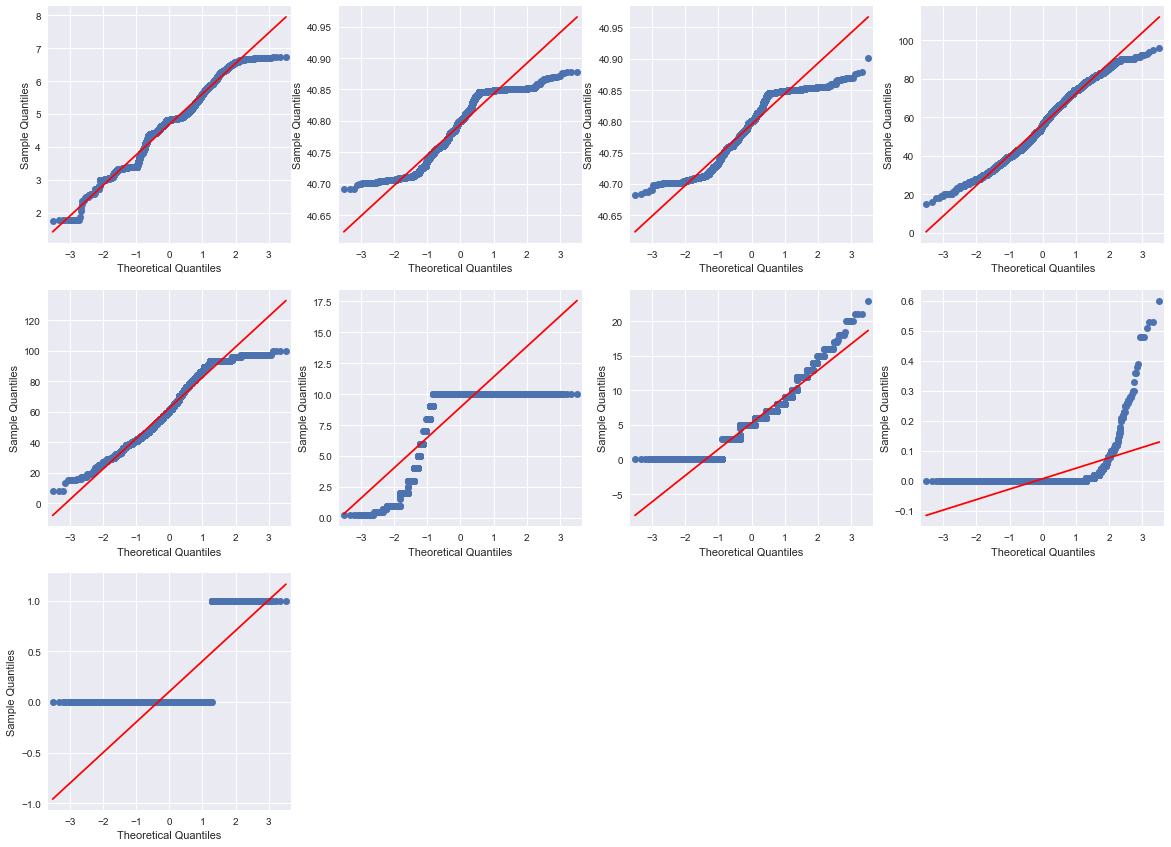

In [44]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(441)
ax2 = fig.add_subplot(442)
ax3 = fig.add_subplot(443)
ax4 = fig.add_subplot(444)
ax5 = fig.add_subplot(445)
ax6 = fig.add_subplot(446)
ax7 = fig.add_subplot(447)
ax8 = fig.add_subplot(448)
ax9 = fig.add_subplot(449)


# q-q plot
qqplot(np.log(df_filtered_1['Duration(min)']), line='s',ax = ax1)
qqplot(df_filtered_1['Start_Lat'], line='s',ax=ax2)
# qqplot(df_filtered_1['Start_Lng'], line='s', ax=ax2)
qqplot(df_filtered_1['End_Lat'], line='s', ax=ax3)
# qqplot(df_filtered_1['End_Lng'], line='s', ax=ax3)
qqplot(df_filtered_1['Temperature(F)'], line='s', ax=ax4)
qqplot(df_filtered_1['Humidity(%)'], line='s', ax=ax5)
qqplot(df_filtered_1['Visibility(mi)'], line='s', ax=ax6)
qqplot(df_filtered_1['Wind_Speed(mph)'], line='s', ax=ax7)
qqplot(df_filtered_1['Precipitation(in)'], line='s', ax=ax8)
qqplot(df_filtered_1['Amenity'], line='s', ax=ax9)
# qqplot(df_filtered_1['Crossing'], line='s')
# qqplot(df_filtered_1['Give_Way'], line='s')
# qqplot(df_filtered_1['Junction'], line='s')
# qqplot(df_filtered_1['No_Exit'], line='s')
# qqplot(df_filtered_1['Railway'], line='s')
# qqplot(df_filtered_1['Roundabout'], line='s')
# qqplot(df_filtered_1['Station'], line='s')
# qqplot(df_filtered_1['Stop'], line='s')
# qqplot(df_filtered_1['Traffic_Calming'], line='s')
# qqplot(df_filtered_1['Traffic_Signal'], line='s')
pyplot.show()

#### 3. Correlation

In [45]:
df_filtered_1_1 = df_filtered_1

Text(0.5, 0, 'Amenity')

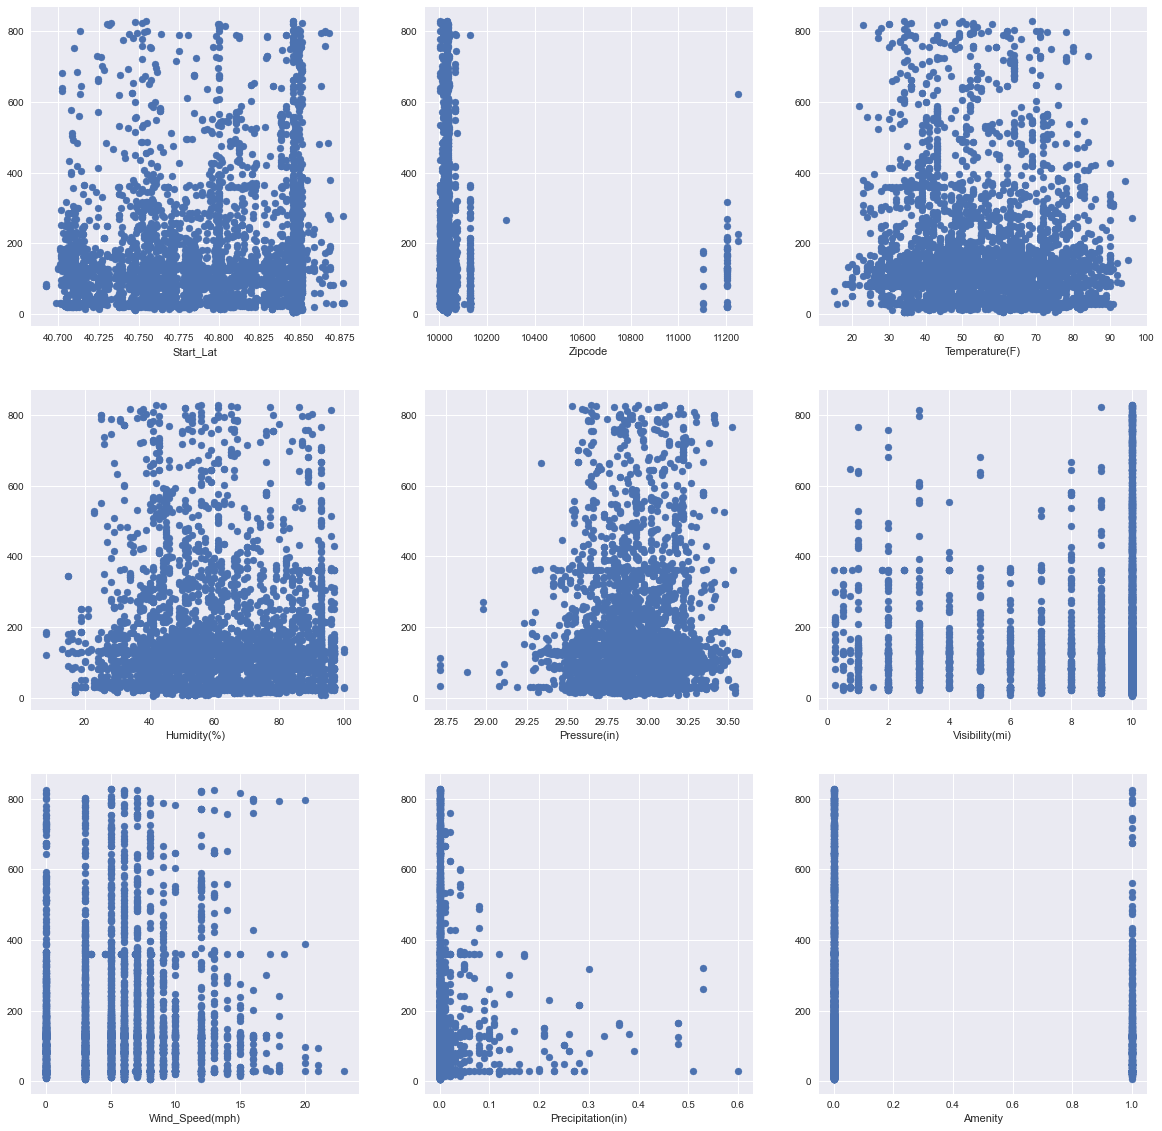

In [46]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)
# ax10 = fig.add_subplot(230)


# ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', #'Zipcode',
#                             'Temperature(F)', 'Humidity(%)', 
#                            'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
#                            'Precipitation(in)', 'Amenity', 'Crossing',
#                            'Give_Way', 'Junction', 'No_Exit', 'Railway', 
#                            'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
#                            'Traffic_Signal']
ax1.scatter(df_filtered_1_1['Start_Lat'],df_filtered_1_1['Duration(min)'])
ax1.set_xlabel("Start_Lat")

ax2.scatter(df_filtered_1_1['Zipcode'],df_filtered_1_1['Duration(min)'])
ax2.set_xlabel("Zipcode")

ax3.scatter(df_filtered_1_1['Temperature(F)'],df_filtered_1_1['Duration(min)'])
ax3.set_xlabel("Temperature(F)")

ax4.scatter(df_filtered_1_1['Humidity(%)'],df_filtered_1_1['Duration(min)'])
ax4.set_xlabel("Humidity(%)")

ax5.scatter(df_filtered_1_1['Pressure(in)'],df_filtered_1_1['Duration(min)'])
ax5.set_xlabel("Pressure(in)")

ax6.scatter(df_filtered_1_1['Visibility(mi)'],df_filtered_1_1['Duration(min)'])
ax6.set_xlabel("Visibility(mi)")

ax7.scatter(df_filtered_1_1['Wind_Speed(mph)'],df_filtered_1_1['Duration(min)'])
ax7.set_xlabel("Wind_Speed(mph)")

ax8.scatter(df_filtered_1_1['Precipitation(in)'],df_filtered_1_1['Duration(min)'])
ax8.set_xlabel("Precipitation(in)")

ax9.scatter(df_filtered_1_1['Amenity'],df_filtered_1_1['Duration(min)'])
ax9.set_xlabel("Amenity")



### Regression Models

Tran(.8)/Test(.2) Dataset

* Linear Model - Feature Selection
* Generalized Linear Model with interaction/squared terms
* RandonForest
* KNN
* SVR

In [47]:
def model_result(model, X_train,y_train,X_test, y_test):
    print("--------- Testing Accuracy ----------")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot()
    ax1.scatter(y_pred, y_test)
    ax1.plot(np.linspace(2, 8, 100), np.linspace(2, 8, 100))
    ax1.set_title('Random Forest - log Duration(min)')
    ax1.set_xlabel("y_predict")
    ax1.set_ylabel("y_test")

    print("Testing R_square:",r2_score(y_test, y_pred))
    print('Testing Mean Squared Error:',mse(y_test, y_pred))
    print("--------- Training Accuracy ----------")
    y_train_pred = model.predict(X_train)
    print("Training R_square:",r2_score(y_train, y_train_pred))
    print('Training Mean Squared Error:',mse(y_train, y_train_pred))

    return y_pred

In [81]:
#### Get rid of Outliers (by percentile)
df5 = df[df["Duration(min)"] <= np.percentile(df['Duration(min)'],97.5)]

#Sample (run too slow)
# df5_1 = df5.sample(n=10000, random_state=1)
df5_1 = df5
train_df, test_df = train_test_split(df5_1, test_size=0.2)



X_train = train_df.loc[:, ['Start_Lat', 
                           'Start_Lng',
                           #'End_Lat', 'End_Lng', 
                            # 'Distance(mi)',
                           'weekday',
                           'hour',
                           'Zipcode', 
                           'Temperature(F)', 'Humidity(%)', 
                           'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                           'Precipitation(in)', 'Amenity', 'Crossing',
                           'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                           'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                           'Traffic_Signal']]
y_train = np.log(train_df.loc[:, 'Duration(min)'])
# y_train = train_df.loc[:, 'Duration']

X_test = test_df.loc[:, ['Start_Lat', 
                         'Start_Lng',
                         #'End_Lat', 'End_Lng', 
                         #'Distance(mi)',
                         'weekday',
                           'hour',
                           'Zipcode', 
                          'Temperature(F)', 'Humidity(%)', 
                           'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                           'Precipitation(in)', 'Amenity', 'Crossing',
                         
                           'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                           'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                           'Traffic_Signal']]
y_test = np.log(test_df.loc[:, 'Duration(min)'])

In [82]:
lr_model = LinearRegression()
y_pred_lr = model_result(lr_model, X_train, y_train, X_test, y_test)

--------- Testing Accuracy ----------
Testing R_square: 0.04086931138976557
Testing Mean Squared Error: 0.928447587426533
--------- Training Accuracy ----------
Training R_square: 0.0455192670272071
Training Mean Squared Error: 0.8942817599520314


--------- Testing Accuracy ----------
Testing R_square: 0.47590911116855505
Testing Mean Squared Error: 0.5073249423734372
--------- Training Accuracy ----------
Training R_square: 0.8869227664341817
Training Mean Squared Error: 0.10594546746773292


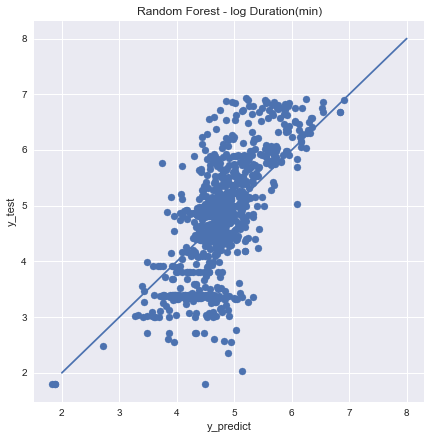

In [83]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=17, random_state=0, n_jobs=-1)
rf_test_pred = model_result(rf_model, X_train, y_train, X_test, y_test)

<AxesSubplot:>

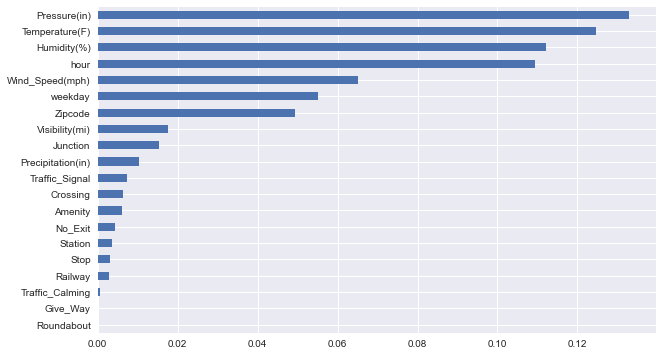

In [84]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=17, random_state=0, n_jobs=-1)
rf_model.fit(X_train, y_train)
fig = plt.figure(figsize=(10,6))
importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importance.nsmallest(20).plot(kind='barh')
# plt.barh([x for x in range(len(importance))], importance)

--------- Testing Accuracy ----------
Testing R_square: 0.063049856552438
Testing Mean Squared Error: 0.9069766097082325
--------- Training Accuracy ----------
Training R_square: 0.41296826501490747
Training Mean Squared Error: 0.5500077214498652


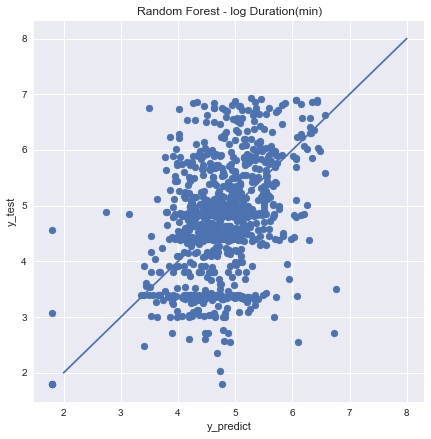

In [85]:
knn_scaler = StandardScaler()
knn_scaler.fit(X_train)
knn_train = knn_scaler.transform(X_train)
knn_test = knn_scaler.transform(X_test)
 
knn_model = KNeighborsRegressor()
knn_test_pred = model_result(knn_model, knn_train, y_train, knn_test, y_test)


--------- Testing Accuracy ----------
Testing R_square: 0.12894749207286138
Testing Mean Squared Error: 0.8431870746192213
--------- Training Accuracy ----------
Training R_square: 0.23084260614707863
Training Mean Squared Error: 0.7206467392092608


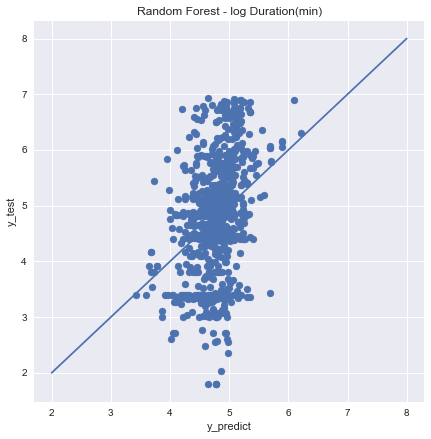

In [86]:
svr_scaler = StandardScaler()
svr_scaler.fit(X_train)
svr_train = svr_scaler.transform(X_train)
svr_test = svr_scaler.transform(X_test)

svr_model = SVR(kernel = 'rbf')
svr_test_pred = model_result(svr_model, svr_train, y_train, svr_test, y_test)
